# Лабораторная работа №2

In [2]:
# вариант 6 
# 2014 MSE D O I H G E

In [3]:
import pandas as pd # Импорт библиотеки пандас для работы с таблицами
import matplotlib.pyplot as plt # Импорт библиотеки matplotlib для работы с графиками

In [4]:
# Чтение таблицы из эксель файла в датафрейм 
df0 = pd.read_excel('2014.xlsx', sheet_name='2013 NYC Benchmark Data')

In [5]:
df0.head() # Смотрим первые пять строк датафрейма

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions,Direct GHG Emissions\n(MtCO2e),Indirect GHG Emissions\n(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)\n(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,16099,4.084010e+09,NaN,4084010096,4453435,NaN,NaN,Queens,NaN,Not on Covered Buildings List,...,NaN,None,Not Available,966.7,806.6,160.1,91968,NaN,Multifamily Housing,NaN
1,500,1.005050e+09,NaN,1005050001,1007817,150,VARICK STREET,Manhattan,10013.0,Filed,...,Yes,ABS,44,1392.3,337.9,1054.4,235370,214110.0,Distribution Center,1.0
2,5017,1.021420e+09,NaN,1021420100,1063495,4079,BROADWAY,Manhattan,10032.0,Filed,...,No,None,Not Available,673.6,541.8,131.8,64806,64816.0,Multifamily Housing,1.0
3,5116,1.021750e+09,NaN,1021750080,1064235,60,SHERMAN AVENUE,Manhattan,10040.0,Filed,...,No,None,Not Available,485,403,82,62839,62847.0,Multifamily Housing,1.0
4,363,1.003360e+09,NaN,1003360005,1088884,16,BIALYSTOKER PLACE,Manhattan,10002.0,Filed,...,No,None,Not Available,435.5,290,145.5,98000,98052.0,Multifamily Housing,1.0


In [6]:
# Cчитываем в новый датафрейм данные, которые нам нужны по варианту (и дополнительно, более нормальные)

In [7]:
df = df0[['Street Name', 'Borough', 'Zip Code','Municipally Supplied Potable Water - Indoor Intensity',
          'Total GHG Emissions', 'Weather Normalized Site EUI', 'ENERGY STAR Score']]

In [8]:
df.head()

,Street Name,Borough,Zip Code,Municipally Supplied Potable Water - Indoor Intensity,Total GHG Emissions,Weather Normalized Site EUI,ENERGY STAR Score
0,NaN,Queens,NaN,Not Available,966.7,178.7,Not Available
1,VARICK STREET,Manhattan,10013.0,8.71,1392.3,81.9,44
2,BROADWAY,Manhattan,10032.0,Not Available,673.6,137.5,Not Available
3,SHERMAN AVENUE,Manhattan,10040.0,Not Available,485,103,Not Available
4,BIALYSTOKER PLACE,Manhattan,10002.0,Not Available,435.5,74,Not Available


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16170 entries, 0 to 16169
Data columns (total 7 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Street Name                                            14458 non-null  object 
 1   Borough                                                16170 non-null  object 
 2   Zip Code                                               14432 non-null  float64
 3   Municipally Supplied Potable Water - Indoor Intensity  13790 non-null  object 
 4   Total GHG Emissions                                    12380 non-null  object 
 5   Weather Normalized Site EUI                            13790 non-null  object 
 6   ENERGY STAR Score                                      13790 non-null  object 
dtypes: float64(1), object(6)
memory usage: 884.4+ KB


In [10]:
# приводим каждое значение в столбце ENERGY STAR Score к числовому виду. Если не получается, то заменяем NaN
df['ENERGY STAR Score']  = pd.to_numeric(df['ENERGY STAR Score'], errors='coerce')
df = df.dropna(subset=['ENERGY STAR Score']) # Удаляем наны в целевой переменной

<ipython-input-10-d396e0947ee2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ENERGY STAR Score']  = pd.to_numeric(df['ENERGY STAR Score'], errors='coerce')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 1 to 13783
Data columns (total 7 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Street Name                                            1780 non-null   object 
 1   Borough                                                2032 non-null   object 
 2   Zip Code                                               1780 non-null   float64
 3   Municipally Supplied Potable Water - Indoor Intensity  2032 non-null   object 
 4   Total GHG Emissions                                    2029 non-null   object 
 5   Weather Normalized Site EUI                            2032 non-null   object 
 6   ENERGY STAR Score                                      2032 non-null   float64
dtypes: float64(2), object(5)
memory usage: 127.0+ KB


In [12]:
# приводим каждое значение в данных столбцах к числовому виду. Если не получается, то заменяем NaN

df['Municipally Supplied Potable Water - Indoor Intensity']  = pd.to_numeric(df['Municipally Supplied Potable Water - Indoor Intensity'], errors='coerce')
df['Total GHG Emissions']  = pd.to_numeric(df['Total GHG Emissions'], errors='coerce')
df['Weather Normalized Site EUI'] = pd.to_numeric(df['Weather Normalized Site EUI'], errors='coerce')

In [13]:
# смотрим кол-во NaN в каждом столбце
df.isna().sum()

Street Name                                               252
Borough                                                     0
Zip Code                                                  252
Municipally Supplied Potable Water - Indoor Intensity    1364
Total GHG Emissions                                         3
Weather Normalized Site EUI                               433
ENERGY STAR Score                                           0
dtype: int64

In [14]:
# удаляем данный столбец так-как в нем слишком много NaN
df = df.drop('Municipally Supplied Potable Water - Indoor Intensity', axis = 1)

In [15]:
# заполняем пропущенные значения в столбце ГХГ средним значением для столбца ГХГ
# и так для каждого столбца


df['Total GHG Emissions'].fillna(df['Total GHG Emissions'].mean(), inplace=True)
df['Weather Normalized Site EUI'].fillna(df['Weather Normalized Site EUI'].mean(), inplace=True)
df['Zip Code'].fillna(df['Weather Normalized Site EUI'].mean(), inplace = True)

In [16]:
# Считаем кол-во встречающихся значений в столбце Street Name
df['Street Name'].value_counts() 

BROADWAY              111
5 AVENUE               91
MADISON AVENUE         62
AVENUE OF THE AMER     34
PARK AVENUE            33
                     ... 
NOSTRAND AVENUE         1
EAST   18 STREET        1
GERARD AVENUE           1
WORTMAN AVENUE          1
TARGEE STREET           1
Name: Street Name, Length: 604, dtype: int64

In [17]:
# Считаем кол-во встречающихся значений в столбце Zip Code
df['Zip Code'].value_counts()

18378.408443    252
10018.000000    140
10001.000000    130
10022.000000     99
10016.000000     94
               ... 
10472.000000      1
11420.000000      1
11242.000000      1
10459.000000      1
10103.000000      1
Name: Zip Code, Length: 159, dtype: int64

In [18]:
# Кодируем столбец районов и зип-кодов через One-hotcoding
ohc_borough = pd.get_dummies(df['Borough']) 
ohc_zip = pd.get_dummies(df['Zip Code'])

In [19]:
# Выкидываем стрит намбер т.к кол-во уникальных значений слишком много и из-за этого их нельзя кодировать OHE
# Из-за этого выкидываем и зип код. С ним качество предсказания падает оч сильно

df = df.drop(['Borough', 'Zip Code', 'Street Name'], axis=1)

In [20]:
# объединяем наш датафрейм с датафреймом OHC для районов
df = pd.concat([df, ohc_borough], axis= 1)

# Обучение

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics

In [22]:
labels = df['ENERGY STAR Score']
df =df.drop(['ENERGY STAR Score'], axis = 1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, 
                                                    test_size = 0.3,
                                                   random_state = 42)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1422, 7)
(610, 7)
(1422,)
(610,)


Text(0.5, 1.0, 'Test')

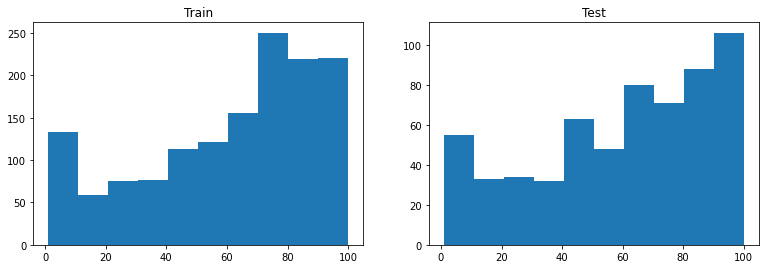

In [25]:
#Целевой признак на обучающей выборке и на отложенном тесте

# ГРАФИКИ ДОЛЖНЫ БЫТЬ ПОХОЖИ ДРУГ НА ДРУГА
# На них изображено по оси Х распределение Energy Star Score, разбитое на диапазоны [0, 10], [11, 20,] ... [91, 100]
# По оси Y - кол-во зданий с такими Energy Srar score

plt.figure(figsize=(13, 9))


plt.subplot(2,2,1)
plt.hist(y_train)
plt.title('Train')

plt.subplot(2,2,2)
plt.hist(y_test)
plt.title('Test')

In [26]:
# Model
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [29]:
# Оценим ошибку с помощью MSE
# Это нормально, что она такая большая. Т.к квадратичный критерий увеличивает значение "больших" ошибок и 
# уменьшает значения маленьких
prediction = regressor.predict(X_test)
metrics.mean_squared_error(y_test, prediction)

850.5229335494852

In [30]:
print(y_test[:10])

1868     43.0
3845     77.0
1325     43.0
1453     44.0
13497    11.0
3074     92.0
1698     48.0
1039     65.0
5795     91.0
8052     84.0
Name: ENERGY STAR Score, dtype: float64


In [31]:
print(prediction[:10])

[64.03760184 64.02365942 64.02263812 64.02362907 64.02363318 64.02359019
 64.03746503 64.02357221 55.18183724 55.59578185]
